# Restaurant Revenue Prediction

## Problem Statement

With over 1,200 quick service restaurants across the globe, TFI is the company behind some of the world's most well-known brands: Burger King, Sbarro, Popeyes, Usta Donerci, and Arby’s. They employ over 20,000 people in Europe and Asia and make significant daily investments in developing new restaurant sites.

We are building a  regression model that will predict the Revenue of new restaurents and what should the TFI company take into consideration when investing on a new restaurant to achieve  highly profitability.R2 and RMSE will be used to choose the model to used.

###  _Data Collection and Data dictionnary_ 


The dataset used is from a Kaggle competion https://www.kaggle.com/c/restaurant-revenue-prediction/data.


1. `Id` : Restaurant id.
2. `Open Date` : opening date for a restaurant
3. `City` : City that the restaurant is in. Note that there are unicode in the names.
4. `City Group` : Type of the city. Big cities, or Other.
5. `Type` : Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
6. `P1`, `P2` - `P37` : There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
7. `Revenue` : The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values.

### _Imports_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNetCV, ElasticNet
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import r2_score,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,confusion_matrix,mean_absolute_percentage_error,mean_squared_log_error
from sklearn.pipeline import Pipeline


In [2]:
train = pd.read_csv('./data/train.csv') # train data/

In [3]:
test = pd.read_csv('./data/test.csv') # Test data

### _Reading the Data_

In [4]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [5]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [6]:
train.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

In [7]:
train.describe(include='all')

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137,137,137,137,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
unique,NaN,134,34,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01/07/2000,İstanbul,Big Cities,FC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,78,76,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,68.000000,NaN,NaN,NaN,NaN,4.014599,4.408759,4.317518,4.372263,2.007299,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,NaN,NaN,NaN,NaN,2.910391,1.514900,1.032337,1.016462,1.209620,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,4.000000,4.000000,1.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,NaN,NaN,NaN,NaN,3.000000,5.000000,4.000000,4.000000,2.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,NaN,NaN,NaN,NaN,4.000000,5.000000,5.000000,5.000000,2.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06


In [8]:
train['revenue'].describe()

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

In [9]:
test.shape

(100000, 42)

In [10]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


### _Data Cleaning_

In [11]:
def missing_values(data): # function to check missing value 
        mis_total = data.isnull().sum()
        mis_pct = 100 * data.isnull().sum() / len(data)
        mis_value_table = pd.concat([mis_total, mis_pct], axis = 1)
        mis_value_table_columns = mis_value_table.rename(columns = {0 : 'No. of Missing Value', 1 : '% of Total Missing Value'})
        
        mis_value_table_columns = mis_value_table_columns[mis_value_table_columns.iloc[:,1] != 0].sort_values('% of Total Missing Value', ascending = False).round(2)
        return mis_value_table_columns

In [12]:
missing_values(train) # find missing value in train 

,No. of Missing Value,% of Total Missing Value


In [13]:
missing_values(test) # No missing values on testing data. 

,No. of Missing Value,% of Total Missing Value


In [14]:
train['Open Date'] = pd.to_datetime(train['Open Date']) # change `Open Date` datatype

In [15]:
test['Open Date'] = pd.to_datetime(test['Open Date'])

In [16]:
train['year'] = train['Open Date'].dt.year # extract the year from the dataset 

In [17]:
test['year'] = test['Open Date'].dt.year

In [18]:
train['month'] = train['Open Date'].dt.month # extract month from the dataset 

In [19]:
test['month'] = test['Open Date'].dt.month

In [20]:
lookup = {
    11: 'Winter',
    12: 'Winter',
    1: 'Winter',
    2: 'Spring',
    3: 'Spring',
    4: 'Spring',
    5: 'Summer',
    6: 'Summer',
    7: 'Summer',
    8: 'Fall',
    9: 'Fall',
    10: 'Fall'
}

In [21]:
train['season'] = train['Open Date'].apply(lambda x : lookup[x.month]) # convert month to seasons. 

In [22]:
test['season'] = test['Open Date'].apply(lambda x : lookup[x.month])

In [23]:
 train['City Group'].unique() # find the unique values 

array(['Big Cities', 'Other'], dtype=object)

In [24]:
train['City'].nunique() 

34

In [25]:
test['City'].nunique() # the unique value in city from the train the test data are significantly different. thus, this column is being dropped. 

57

In [26]:
train.drop('City', axis = 1, inplace = True)
test.drop('City', axis = 1, inplace = True)

##### _The `test` data has way more unique values than train data. Thus, the `City` feature will be less useful for any model_

In [27]:
train['Type'].unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [28]:
test['Type'].unique() # the test data has one extract type as MB (mobile), we will tranlate that into DT . 

array(['FC', 'IL', 'DT', 'MB'], dtype=object)

In [29]:
test.loc[test['Type'] == 'MB', 'Type'] = 'DT'

##### _In the `train` dataset, there is no such `Type` as `MB` as in the `test` data. The `MB` stands as mobile which similar to the `DT` in nature. we will change `MB` to `DT` for better predictions._

In [30]:
train['revenue'].describe()

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

In [31]:
test['Type'].unique()

array(['FC', 'IL', 'DT'], dtype=object)

In [32]:
train.drop(columns = ['Id', 'Open Date','month'], inplace = True) # dropping ID and open date in the training data as it will not be necessary. 

In [33]:
test.drop(columns = ['Open Date','month'], inplace = True) # dropping ID and open date in the testing data

In [34]:
train.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,revenue,year,season
0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,...,3,4,5,5,4,3,4,5653753.0,1999,Summer
1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,6923131.0,2008,Spring
2,Other,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,2055379.0,2013,Spring
3,Other,IL,6,4.5,6.0,6.0,4,4,10,8,...,12,10,6,18,12,12,6,2675511.0,2012,Spring
4,Other,IL,3,4.0,3.0,4.0,2,2,5,5,...,1,3,2,3,4,3,3,4316715.0,2009,Summer


### _EDA_

In [35]:
con_var = []
dis_var = []
var_unique = train.nunique()
for var,var_num in enumerate(var_unique):
    if var_num>50:
        con_var.append(var)
    else:
        dis_var.append(var)

con_columns=[train.columns[i] for i in con_var ]
dis_columns=[train.columns[i] for i in dis_var ]

In [36]:
dis_columns # looking at discrete vs continous variable

['City Group',
 'Type',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'year',
 'season']

<AxesSubplot:>

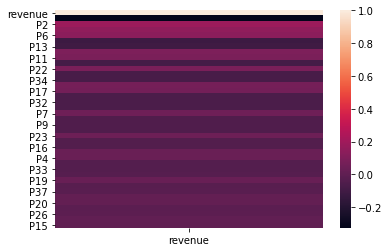

In [37]:
sns.heatmap(train.corr()[['revenue']].sort_values(by = 'revenue', key = abs, ascending = False)) #correlation

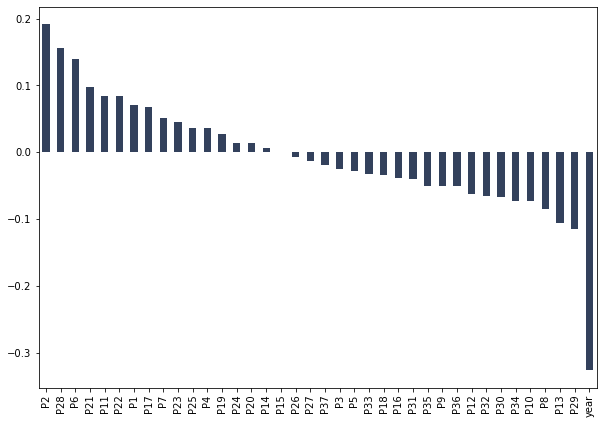

In [38]:
revenue_corr = train.drop(['City Group','Type'],axis=1).corr()['revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,7))
revenue_corr.drop('revenue').plot.bar(color = '#33415C')
plt.show(); # looking at correlations 

In [39]:
dis_columns.append('revenue') 

In [40]:
spearman = train[dis_columns].corr(method ='spearman') # Spearman Correlations. No Strong corrlations have been identified 
spearman_corr = spearman['revenue'].sort_values(ascending = False)
spearman_corr

revenue    1.000000
P28        0.312546
P2         0.256816
P1         0.231995
P6         0.225137
P21        0.205224
P20        0.139311
P17        0.124630
P7         0.123679
P23        0.120974
P25        0.115898
P19        0.106200
P14        0.096887
P24        0.094468
P11        0.091662
P36        0.089499
P26        0.089063
P18        0.086527
P37        0.084253
P15        0.081093
P16        0.079581
P35        0.077735
P22        0.075532
P31        0.075095
P27        0.075008
P34        0.072422
P33        0.070216
P30        0.060424
P32        0.059489
P4         0.043871
P3         0.027661
P9         0.019553
P12        0.018897
P5        -0.017929
P8        -0.034094
P13       -0.048885
P29       -0.048981
P10       -0.049512
year      -0.330274
Name: revenue, dtype: float64

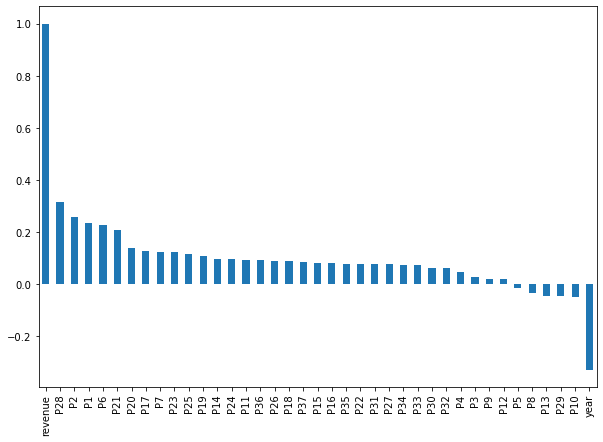

In [41]:
plt.figure(figsize=(10,7))
spearman_corr.plot.bar()
plt.show() # this for the spearman correlation.

In [42]:
train[dis_columns].apply(pd.Series.nunique, axis = 0) # defining number of unique values in each discrete column 

City Group      2
Type            3
P1              8
P2              8
P3              8
P4              6
P5              7
P6              8
P7              6
P8              8
P9              4
P10             4
P11             8
P12             7
P13             5
P14            10
P15             8
P16             9
P17             9
P18             7
P19             9
P20             9
P21             8
P22             5
P23             9
P24             9
P25             8
P26            10
P27             9
P28             9
P29             7
P30             9
P31            10
P32            10
P33             6
P34             8
P35             8
P36             8
P37             8
year           17
season          4
revenue       137
dtype: int64

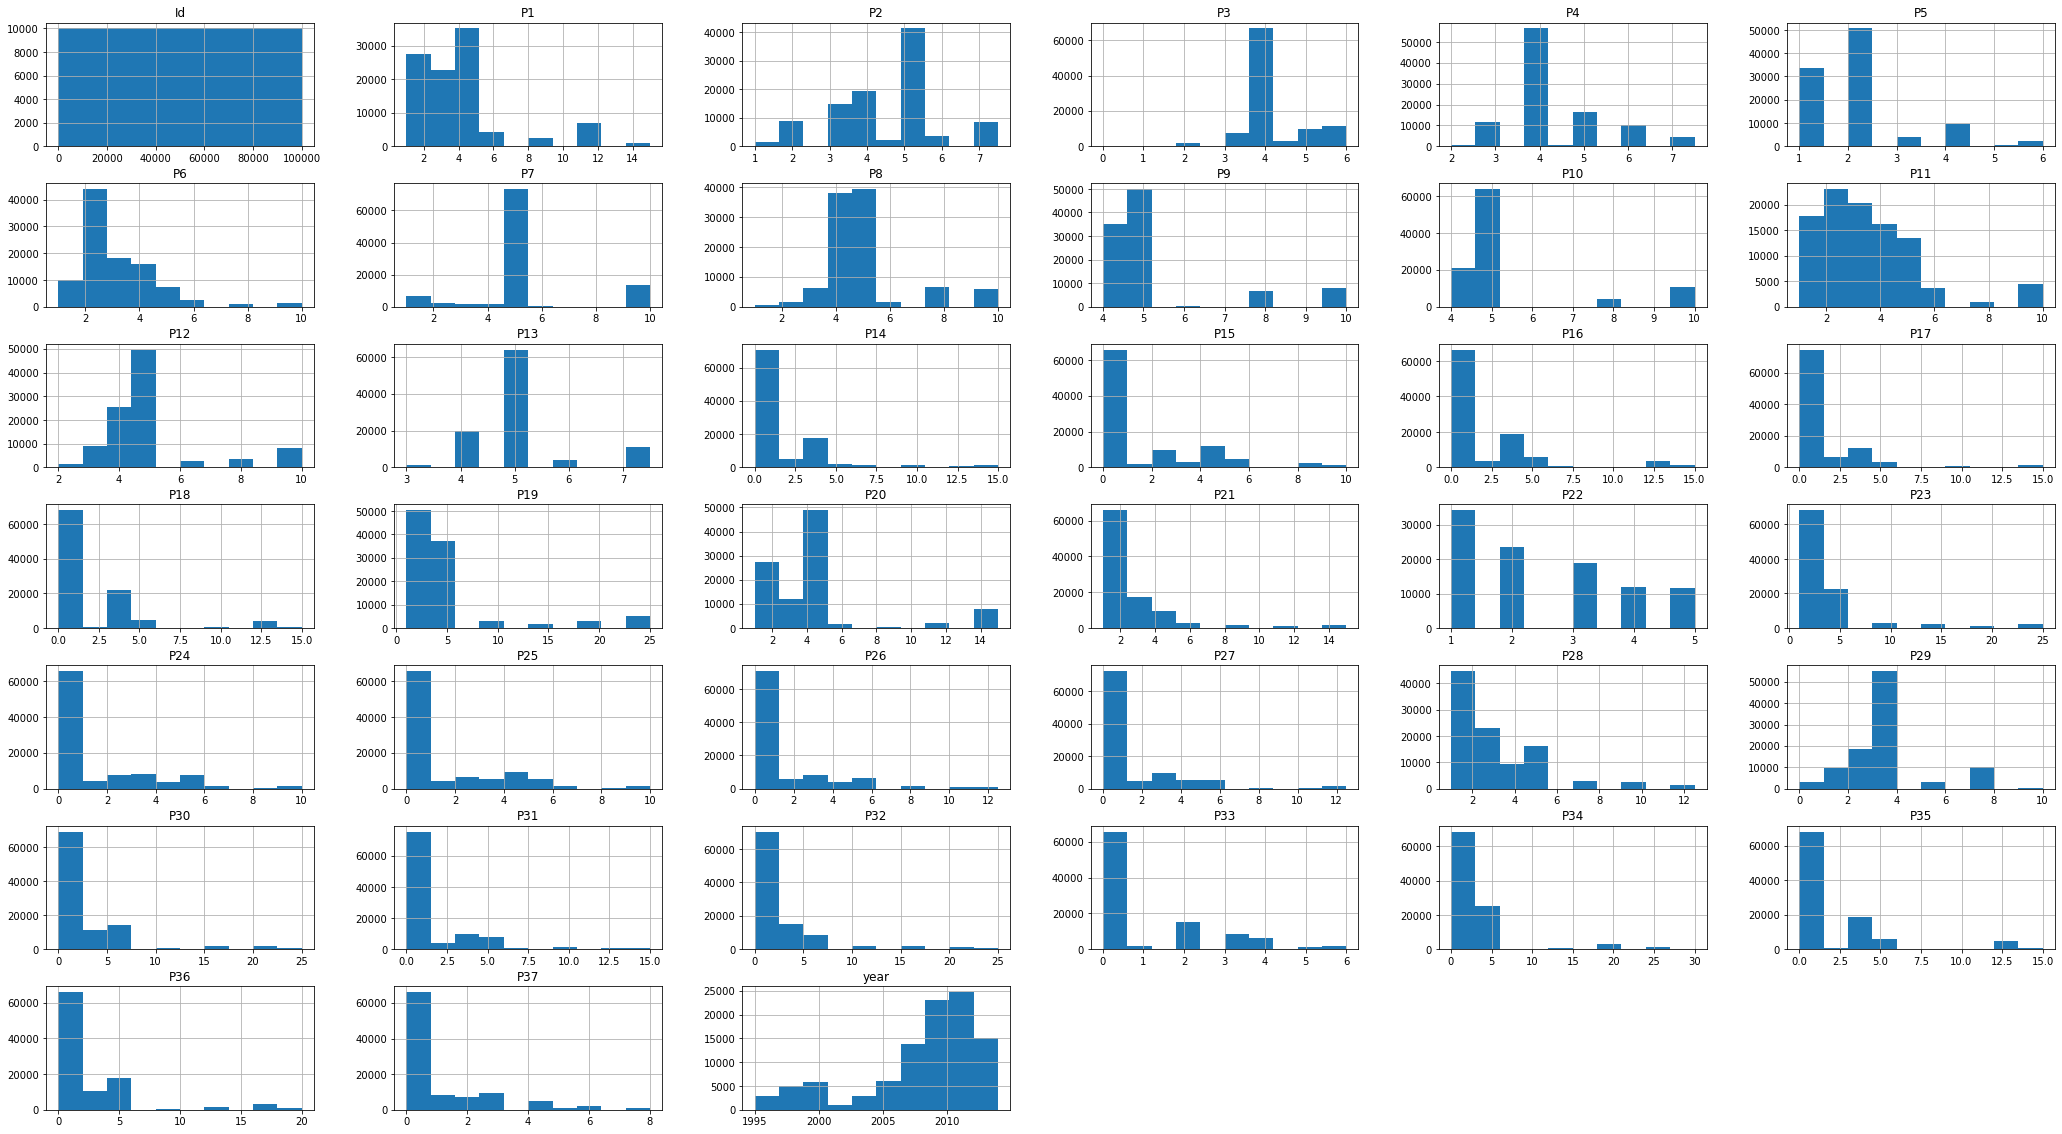

In [43]:
test.hist(figsize = (36,20));# looking at the distribution of the features

In [44]:
#plt.figure(figsize = (20, 12))
#sns.scatterplot(x="revenue", y="City",s=35, alpha = 0.6,data=train)

In [45]:
train['revenue'].max() # define the max which helps to find the outliers shows above 

19696939.0

In [46]:
index_drop1 = train[train['revenue'] == 19696939.0].index # dropping outliers 
train.drop(index_drop1, inplace = True)

In [47]:
index_drop2 = train[train['revenue'] == 16549064.0].index # dropping outliers 
train.drop(index_drop2, inplace = True)

In [48]:
index_drop3 = train[train['revenue'] == 13575224.0].index # dropping outliers
train.drop(index_drop3, inplace = True)

C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Revenue Distribution (Train Data)')

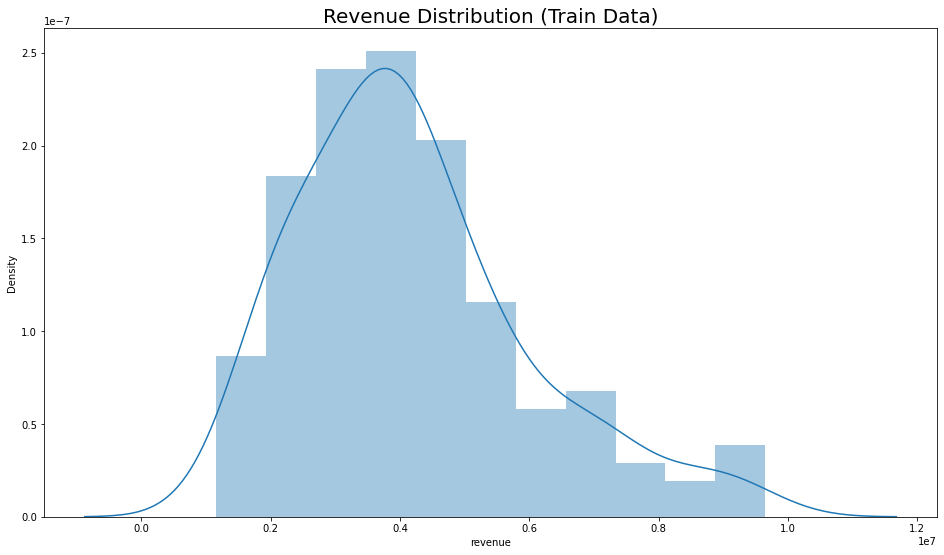

In [49]:
plt.figure (figsize = (16, 9))
sns.distplot(train['revenue'] )
plt.title('Revenue Distribution (Train Data)', fontdict={'fontsize':20})

In [50]:
train['log_revenue'] = np.log1p(train['revenue']) # log transformation. 

C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Transformation Revenue Distribution (Train Data)')

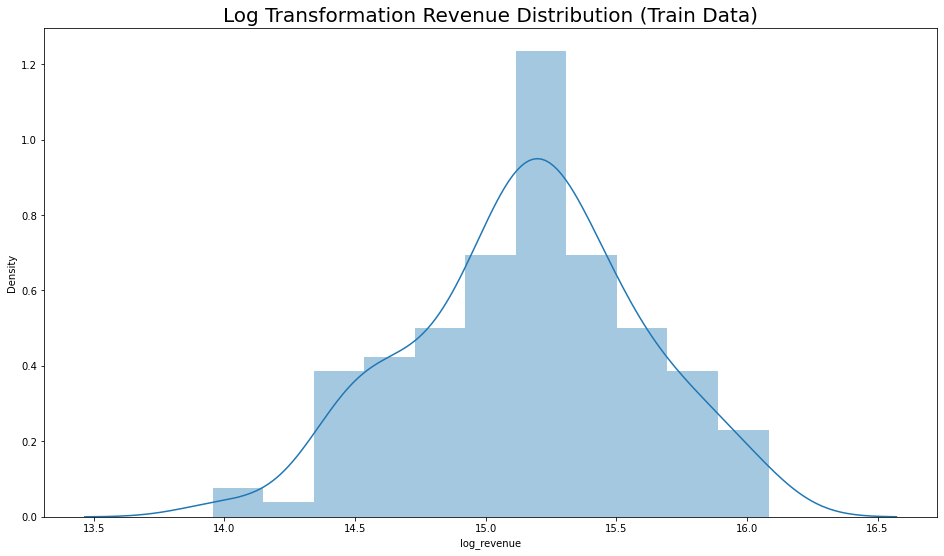

In [51]:
plt.figure (figsize = (16, 9))
sns.distplot(train['log_revenue'])
plt.title('Log Transformation Revenue Distribution (Train Data)', fontdict={'fontsize':20})

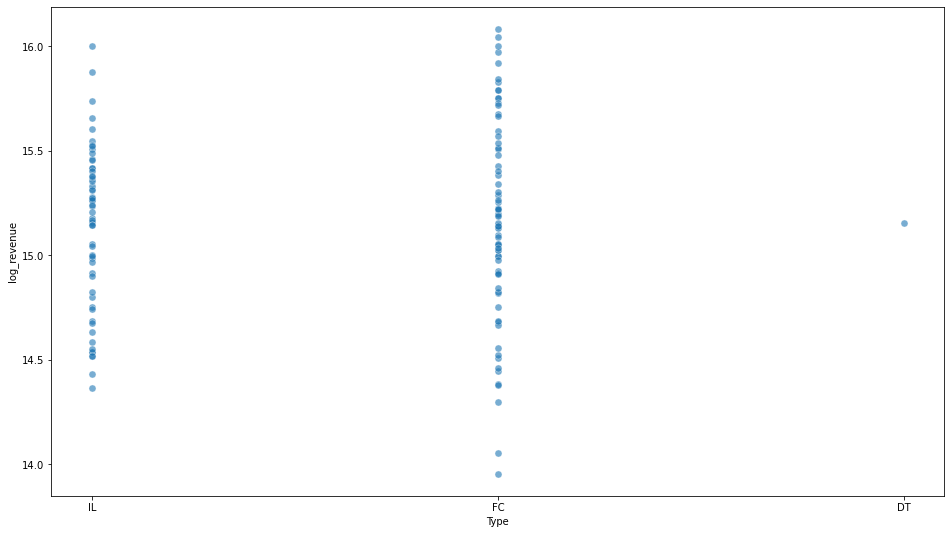

In [52]:
plt.figure (figsize = (16, 9))
fig = sns.scatterplot(x="Type", y="log_revenue",s=50, alpha = 0.6,data=train);

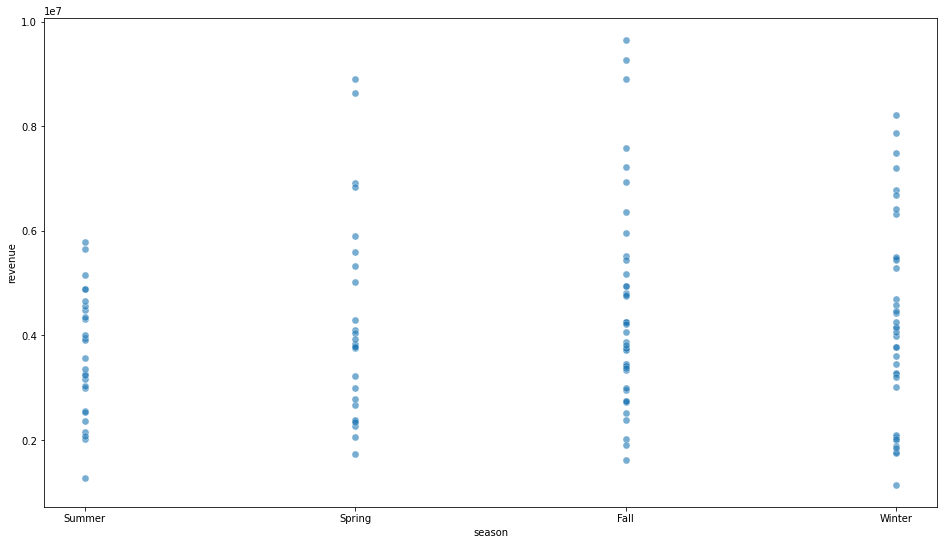

In [53]:
plt.figure (figsize = (16, 9))
fig = sns.scatterplot(x="season", y="revenue",s=50, alpha = 0.6,data=train);

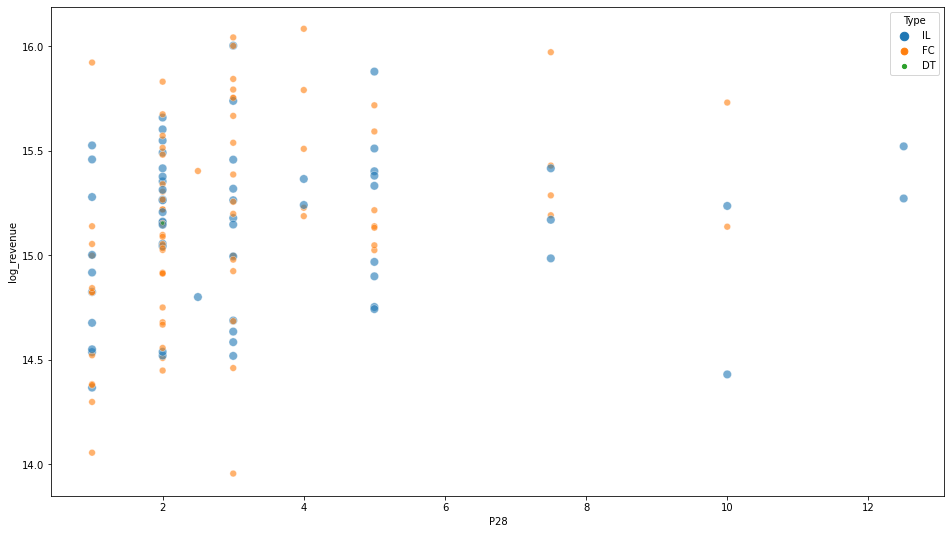

In [54]:
plt.figure (figsize = (16, 9))
fig = sns.scatterplot(x="P28", y="log_revenue",s=50,hue="Type", size = 'Type', alpha = 0.6,data=train);

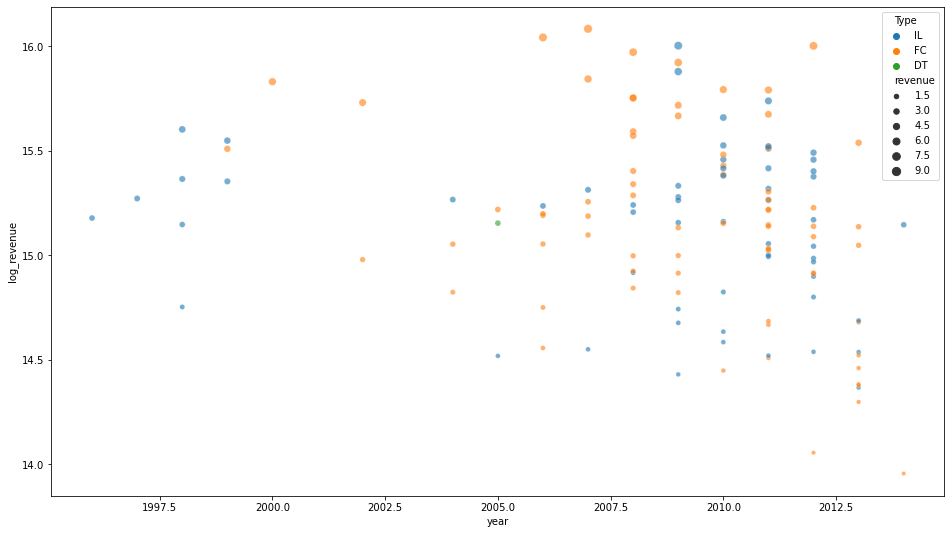

In [55]:
plt.figure (figsize = (16, 9))
fig = sns.scatterplot(x="year", y="log_revenue",s=50,hue="Type", size = 'revenue', alpha = 0.6,data=train);

Text(0.5, 1.0, 'Train Number of Restaurant in each Restaurant Type (by City Group)')

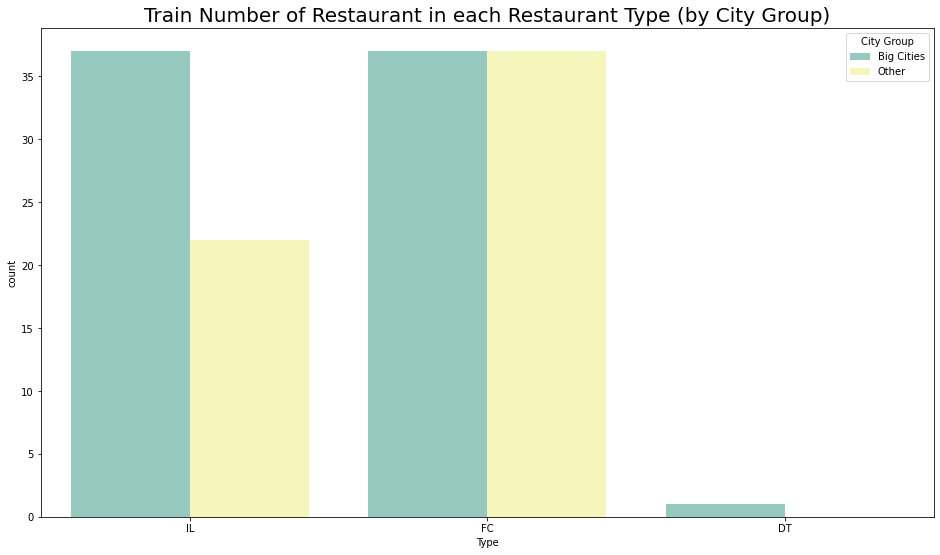

In [56]:
plt.figure (figsize = (16, 9))
sns.countplot(x = 'Type',hue ='City Group', data = train, palette='Set3')
plt.title('Train Number of Restaurant in each Restaurant Type (by City Group)', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Test Data Number of Restaurant in each Restaurant Type (by City Group)')

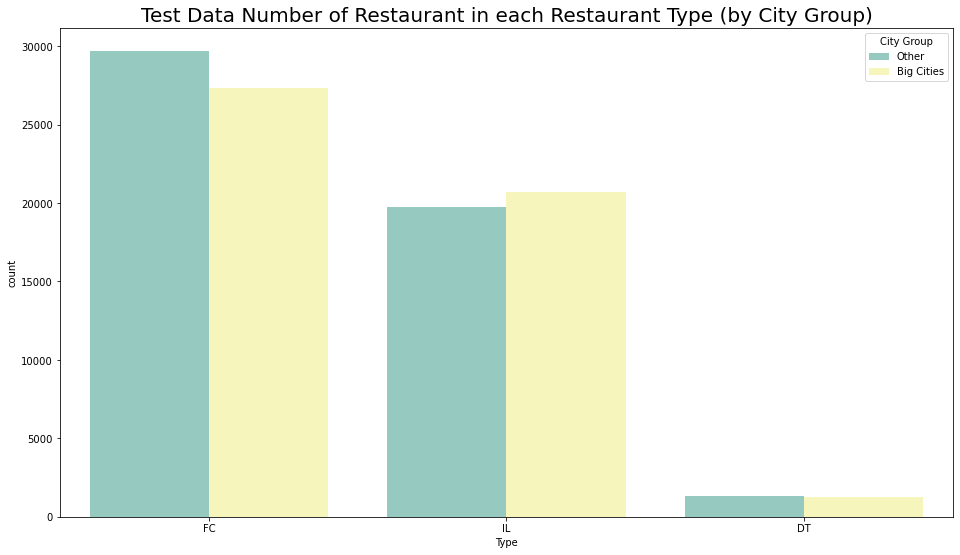

In [57]:
plt.figure (figsize = (16, 9))
sns.countplot(x = 'Type',hue ='City Group', data = test, palette='Set3')
plt.title('Test Data Number of Restaurant in each Restaurant Type (by City Group)', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Number of Restaurants Opened in each Season (by City Group / Train Data)')

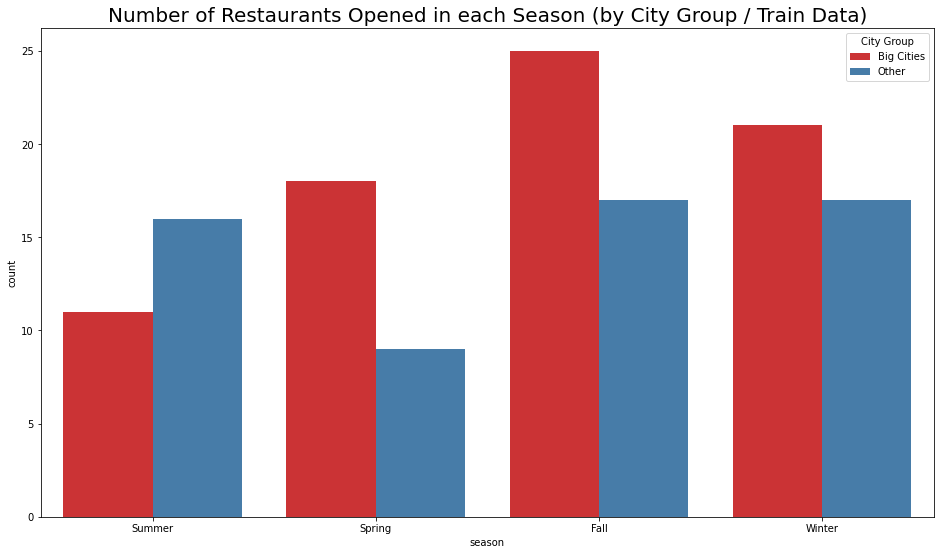

In [58]:
plt.figure (figsize = (16, 9))
sns.countplot(x = 'season',hue ='City Group', data = train, palette='Set1')
plt.title('Number of Restaurants Opened in each Season (by City Group / Train Data)', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Number of Restaurants Opened in each Season (by City Group / Test Data)')

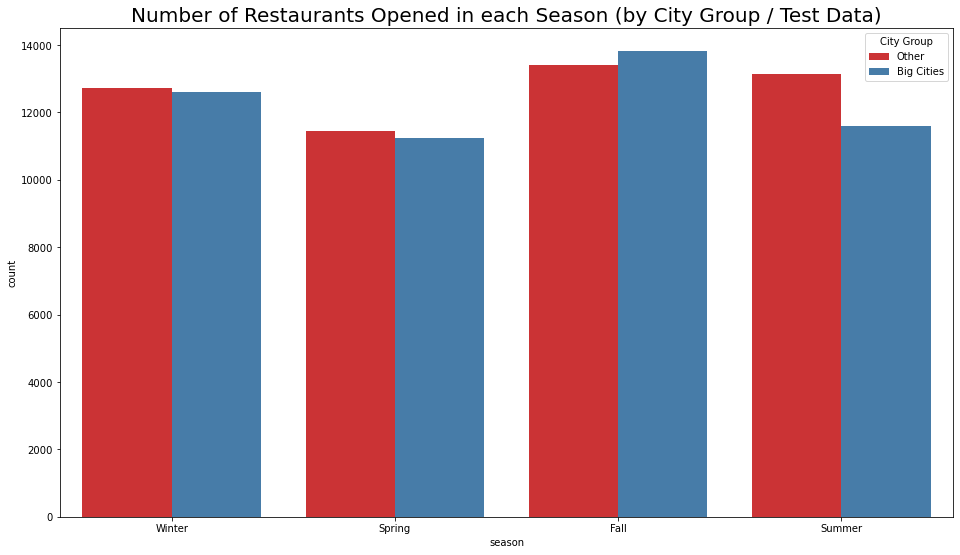

In [59]:
plt.figure (figsize = (16, 9))
sns.countplot(x = 'season',hue ='City Group', data = test, palette='Set1')
plt.title('Number of Restaurants Opened in each Season (by City Group / Test Data)', fontdict={'fontsize':20})

### _Modeling_ 

##### _Pre-Processing_

In [60]:
columns_to_dummy = train.select_dtypes(include = ['object']).columns # changing the cate
train = pd.get_dummies(train, columns = columns_to_dummy, drop_first = False)
test = pd.get_dummies(test, columns = columns_to_dummy, drop_first = False)

In [61]:
train.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,log_revenue,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,season_Fall,season_Spring,season_Summer,season_Winter
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,15.547830,1,0,0,0,1,0,0,1,0
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,15.750379,1,0,0,1,0,0,1,0,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,14.535971,0,1,0,0,1,0,1,0,0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,14.799651,0,1,0,0,1,0,1,0,0
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,15.278005,0,1,0,0,1,0,0,1,0


In [62]:
train.shape

(134, 49)

In [63]:
test.shape

(100000, 48)

In [64]:
X, y = train.drop(columns=['revenue','log_revenue'], axis=1), train['log_revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### _Baseline Model - Linear Regression_

In [65]:
lr = LinearRegression ()

In [66]:
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
lr.score(X_train, y_train)

0.5741578207986675

In [68]:
lr.score(X_test, y_test) # 

-0.9253147916721598

In [69]:
mean_squared_error(y_train, lr.predict(X_train))

0.07727318342558295

In [70]:
mean_squared_error(y_test, lr.predict(X_test))

0.38668126007640324

In [71]:
y_pred = lr.predict(X_test)

In [72]:
print('Explained variance score',explained_variance_score(y_test, y_pred),'\n',
   'Mean absolute error      :',mean_absolute_error(y_test, y_pred),'\n',
   'Mean squared error       :',mean_squared_error(y_test, y_pred),'\n',
   'R² score            :',r2_score(y_test, y_pred))

Explained variance score -0.9218765327162419 
 Mean absolute error      : 0.488084351581609 
 Mean squared error       : 0.38668126007640324 
 R² score            : -0.9253147916721598


In [73]:
score_df_lr = pd.DataFrame(columns=['Method','Linear Regression'])
score_df_lr['Method']=[
                    'Mean Absolute Error',
                    'Mean Squared Error',
                    'RMSE',
                    'R²']
score_df_lr['Linear Regression']=[
                   mean_absolute_error(y_test, y_pred),
                   mean_squared_error(y_test, y_pred),
                   mean_squared_error(y_test, y_pred, squared = False),
                   r2_score(y_test, y_pred)]

In [74]:
score_df_lr

,Method,Linear Regression
0,Mean Absolute Error,0.488084
1,Mean Squared Error,0.386681
2,RMSE,0.621837
3,R²,-0.925315


#### _Lasso Regression_

In [75]:
params_lasso = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],}

In [76]:
lasso = Lasso()

In [77]:
lasso_regressor = GridSearchCV(lasso, params_lasso, cv=5, n_jobs=8)

In [78]:
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=8,
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1, 5,
                                   10, 20]})

In [79]:
lasso_regressor.best_params_

{'alpha': 0.5}

In [80]:
lasso_model = Lasso(alpha = 0.5)

In [81]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.5)

In [82]:
lasso_model.score(X_train, y_train)

0.0

In [83]:
lasso_model.score(X_test, y_test)

-0.0007943878764755663

In [84]:
y_pred = lasso_model.predict(X_test)

In [85]:
print('Explained variance score',explained_variance_score(y_test, y_pred),'\n',
   'Mean absolute error      :',mean_absolute_error(y_test, y_pred),'\n',
   'Mean squared error       :',mean_squared_error(y_test, y_pred),'\n',
   'R² score            :',r2_score(y_test, y_pred))

Explained variance score 0.0 
 Mean absolute error      : 0.34410784208789436 
 Mean squared error       : 0.2010000840669613 
 R² score            : -0.0007943878764755663


In [86]:
score_df_lasso = pd.DataFrame(columns=['Method','Lasso Regression'])
score_df_lasso['Method']=[
                    'Mean Absolute Error',
                    'Mean Squared Error',
                    'RMSE',
                    'R²']
score_df_lasso['Lasso Regression']=[
                   mean_absolute_error(y_test, y_pred),
                   mean_squared_error(y_test, y_pred),
                   mean_squared_error(y_test, y_pred, squared = False),
                   r2_score(y_test, y_pred)]

In [87]:
score_df_lasso

,Method,Lasso Regression
0,Mean Absolute Error,0.344108
1,Mean Squared Error,0.201000
2,RMSE,0.448330
3,R²,-0.000794


#### _Ridge Regression_

In [88]:
ridge = Ridge()

In [89]:
params_ridge = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [90]:
ridge_regressor = GridSearchCV(ridge, params_ridge,cv=5, n_jobs=-1)

In [91]:
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1, 5,
                                   10, 20],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']})

In [92]:
ridge_regressor.best_params_

{'alpha': 20, 'solver': 'saga'}

In [93]:
ridge_model = Ridge(alpha = 20,
                    solver = 'saga')

In [94]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=20, solver='saga')

In [95]:
ridge_model.score(X_train, y_train)

0.43717916909627075

In [96]:
ridge_model.score(X_test, y_test)

-0.08287570068207262

In [97]:
y_pred = ridge_model.predict(X_test)

In [98]:
print('Explained variance score',explained_variance_score(y_test, y_pred),'\n',
   'Mean absolute error      :',mean_absolute_error(y_test, y_pred),'\n',
   'Mean squared error       :',mean_squared_error(y_test, y_pred),'\n',
   'R² score            :',r2_score(y_test, y_pred))

Explained variance score -0.06976521116674173 
 Mean absolute error      : 0.37712279614396604 
 Mean squared error       : 0.21748533915443077 
 R² score            : -0.08287570068207262


In [99]:
score_df_ridge = pd.DataFrame(columns=['Method','Ridge Regression'])
score_df_ridge['Method']=[
                    'Mean Absolute Error',
                    'Mean Squared Error',
                    'RMSE',
                    'R²']
score_df_ridge['Ridge Regression']=[
                   mean_absolute_error(y_test, y_pred),
                   mean_squared_error(y_test, y_pred),
                   mean_squared_error(y_test, y_pred, squared = False),
                   r2_score(y_test, y_pred)]

In [100]:
score_df_ridge

,Method,Ridge Regression
0,Mean Absolute Error,0.377123
1,Mean Squared Error,0.217485
2,RMSE,0.466353
3,R²,-0.082876


#### _Random Forest Regressor_

In [101]:
params_rf = {
    'max_depth': [None, 1, 5, 10, 30, 35],
    'max_features': [.1, .2, .3],
    'n_estimators': [200, 300, 400,500]
}

In [102]:
rf = RandomForestRegressor()

In [103]:
rf_regressor = GridSearchCV(rf, params_rf,cv = 10, n_jobs = -1)

In [104]:
rf_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 5, 10, 30, 35],
                         'max_features': [0.1, 0.2, 0.3],
                         'n_estimators': [200, 300, 400, 500]})

In [105]:
rf_regressor.best_params_

{'max_depth': None, 'max_features': 0.1, 'n_estimators': 200}

In [106]:
rf_model = RandomForestRegressor(max_depth = 65,
                                 max_features = 0.3,
                                 n_estimators = 30)

In [107]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=65, max_features=0.3, n_estimators=30)

In [108]:
rf_model.score(X_train, y_train)

0.8659899709557783

In [109]:
rf_model.score(X_test, y_test)

0.2325766938568351

In [110]:
y_pred = rf_model.predict(X_test)

In [111]:
print('Explained variance score',explained_variance_score(y_test, y_pred),'\n',
   'Mean absolute error      :',mean_absolute_error(y_test, y_pred),'\n',
   'Mean squared error       :',mean_squared_error(y_test, y_pred),'\n',
   'RMSE                    :', mean_squared_error(y_test, y_pred), '\n',
   'R² score            :',r2_score(y_test, y_pred))

Explained variance score 0.23593379759248123 
 Mean absolute error      : 0.3116350103875008 
 Mean squared error       : 0.1541297102764732 
 RMSE                    : 0.1541297102764732 
 R² score            : 0.2325766938568351


In [112]:
score_df_rf = pd.DataFrame(columns=['Method','Random Forest'])
score_df_rf['Method']=[
                    'Mean Absolute Error',
                    'Mean Squared Error',
                    'RMSE',
                    'R²']
score_df_rf['Random Forest']=[
                   mean_absolute_error(y_test, y_pred),
                   mean_squared_error(y_test, y_pred),
                   mean_squared_error(y_test, y_pred, squared = False),
                   r2_score(y_test, y_pred)]

In [113]:
score_df_rf

,Method,Random Forest
0,Mean Absolute Error,0.311635
1,Mean Squared Error,0.154130
2,RMSE,0.392594
3,R²,0.232577


In [114]:
pred_sub_rf = rf_model.predict(test.drop(columns = 'Id'))

In [115]:
pred_sub_rf = np.exp(pred_sub_rf)

In [116]:
residual_rf = np.exp(y_test) - np.exp(y_pred)

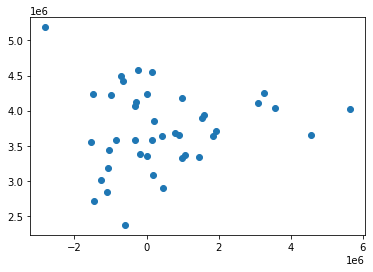

In [117]:
plt.scatter(residual_rf, np.exp(y_pred))

In [118]:
submission_rf= pd.DataFrame(columns = ['Id', 'Prediction'])
submission_rf['Id'] = test['Id']
submission_rf['Prediction'] = pred_sub_rf
submission_rf.to_csv('submission_rf.csv', index = False)

In [119]:
rf_feature = pd.Series(index = X_train.columns, data = np.abs(rf_model.feature_importances_))

<AxesSubplot:>

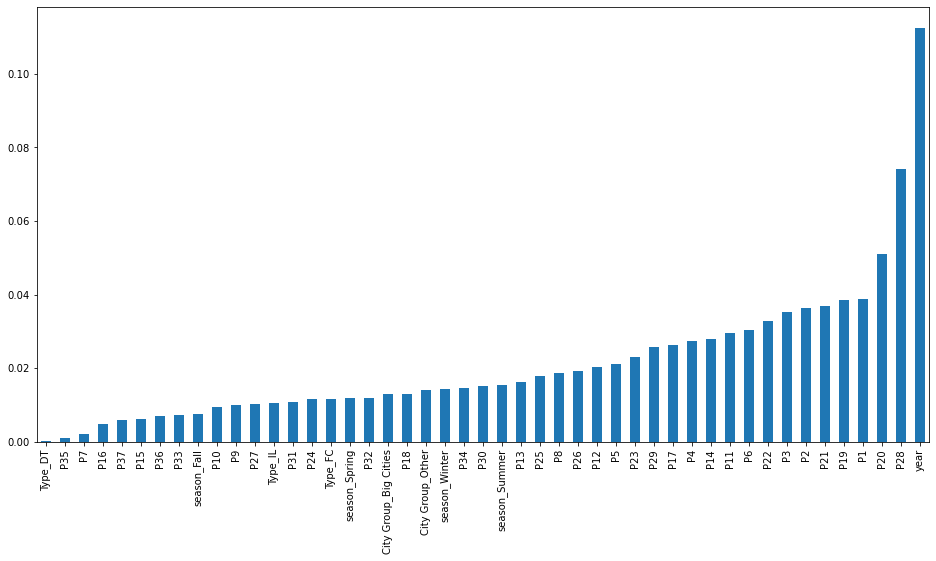

In [120]:
rf_feature.sort_values().plot(kind = 'bar', figsize = (16, 8))

#### _KNeighborRegressor_

In [121]:
knn = KNeighborsRegressor()

In [122]:
params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

In [123]:
knn_regressor = GridSearchCV(knn, params_knn,cv=10, n_jobs=-1)

In [124]:
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [125]:
knn_regressor.best_params_

{'n_neighbors': 9}

In [126]:
knn_model = KNeighborsRegressor(n_neighbors = 9)

In [127]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [128]:
knn_model.score(X_train, y_train)

0.27060217393208885

In [129]:
knn_model.score(X_test, y_test)

0.19248824743143877

In [130]:
y_pred = knn_model.predict(X_test)

In [131]:
print('Explained variance score',explained_variance_score(y_test, y_pred),'\n',
   'Mean absolute error      :',mean_absolute_error(y_test, y_pred),'\n',
   'Mean squared error       :',mean_squared_error(y_test, y_pred),'\n',
   'R² score            :',r2_score(y_test, y_pred))

Explained variance score 0.20851149641227806 
 Mean absolute error      : 0.31728720379350556 
 Mean squared error       : 0.16218109545531684 
 R² score            : 0.19248824743143877


In [132]:
score_df_knn = pd.DataFrame(columns=['Method','KNN'])
score_df_knn['Method']=[
                    'Mean Absolute Error',
                    'Mean Squared Error',
                    'RMSE',
                    'R²']
score_df_knn['KNN']=[
                   mean_absolute_error(y_test, y_pred),
                   mean_squared_error(y_test, y_pred),
                   mean_squared_error(y_test, y_pred, squared = False),
                   r2_score(y_test, y_pred)]

In [133]:
score_df_knn

,Method,KNN
0,Mean Absolute Error,0.317287
1,Mean Squared Error,0.162181
2,RMSE,0.402717
3,R²,0.192488


In [134]:
pred_sub_knn = knn_model.predict(test.drop(columns = 'Id'))

In [135]:
pred_sub_knn = np.exp(pred_sub_knn)

In [136]:
residual_rf = np.exp(y_test) - np.exp(y_pred)

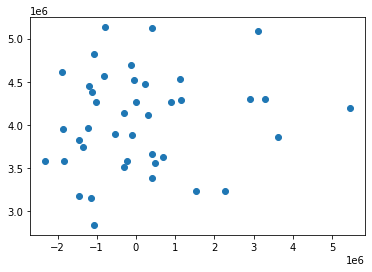

In [137]:
plt.scatter(residual_rf, np.exp(y_pred))

In [138]:
submission_knn= pd.DataFrame(columns = ['Id', 'Prediction'])
submission_knn['Id'] = test['Id']
submission_knn['Prediction'] = pred_sub_knn
submission_knn.to_csv('submission_knn.csv', index = False)

#### _XGBoost Regressor_

In [139]:
xgb = XGBRegressor()

In [140]:
params_xgb = {
    'learning_rate': [.05,.1],
    'max_depth': [4, 9],
    'subsample': [.5, .7],
    'n_estimators': [100,200]
}

In [141]:
xgb_regressor = GridSearchCV(xgb, params_xgb, cv = 10, n_jobs=-1)

In [142]:
xgb_regressor.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [143]:
xgb_regressor.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.5}

In [144]:
xgb_model = XGBRegressor(learning_rate = 0.1, max_depth = 9, n_estimators = 200, subsample = 0.5)

In [145]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
xgb_model.score(X_train, y_train)

0.9997929370652401

In [147]:
xgb_model.score(X_test, y_test)

0.08680457990476842

In [148]:
y_pred = xgb_model.predict(X_test)

In [149]:
print('Explained variance score',explained_variance_score(y_test, y_pred),'\n',
   'Mean absolute error      :',mean_absolute_error(y_test, y_pred),'\n',
   'Mean squared error       :',mean_squared_error(y_test, y_pred),'\n',
   'R² score            :',r2_score(y_test, y_pred))

Explained variance score 0.08724762307217682 
 Mean absolute error      : 0.3426338420863468 
 Mean squared error       : 0.18340666018139262 
 R² score            : 0.08680457990476842


In [150]:
score_df_xgb = pd.DataFrame(columns=['Method','XGBoost'])
score_df_xgb['Method']=[
                    'Mean Absolute Error',
                    'Mean Squared Error',
                    'RMSE',
                    'R²']
score_df_xgb['XGBoost']=[
                   mean_absolute_error(y_test, y_pred),
                   mean_squared_error(y_test, y_pred),
                   mean_squared_error(y_test, y_pred, squared = False),
                   r2_score(y_test, y_pred)]

In [151]:
score_df_xgb

,Method,XGBoost
0,Mean Absolute Error,0.342634
1,Mean Squared Error,0.183407
2,RMSE,0.428260
3,R²,0.086805


In [152]:
residual_rf = np.exp(y_test) - np.exp(y_pred)

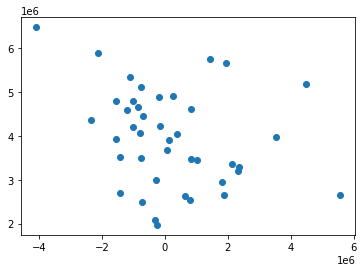

In [153]:
plt.scatter(residual_rf, np.exp(y_pred))

In [154]:
pred_sub_xgb = xgb_model.predict(test.drop(columns = 'Id'))

In [155]:
pred_sub_xgb = np.exp(pred_sub_xgb)

In [156]:
submission_xgb= pd.DataFrame(columns = ['Id', 'Prediction'])
submission_xgb['Id'] = test['Id']
submission_xgb['Prediction'] = pred_sub_xgb
submission_xgb.to_csv('submission_xgb.csv', index = False)

In [157]:
score_df_lr.merge(score_df_ridge,on='Method').merge(score_df_lasso,on='Method').merge(score_df_rf, on = 'Method').merge(score_df_knn, on = 'Method').merge(score_df_xgb, on = 'Method')

,Method,Linear Regression,Ridge Regression,Lasso Regression,Random Forest,KNN,XGBoost
0,Mean Absolute Error,0.488084,0.377123,0.344108,0.311635,0.317287,0.342634
1,Mean Squared Error,0.386681,0.217485,0.201000,0.154130,0.162181,0.183407
2,RMSE,0.621837,0.466353,0.448330,0.392594,0.402717,0.428260
3,R²,-0.925315,-0.082876,-0.000794,0.232577,0.192488,0.086805


### _Conclusion_

We built and evaluated 6 different models. With the simple Linear Regression model as the baseline model, We are comparing all other models to the baseline for evaluations.

1. In the model training and testing part, all three linear model (Linear, Ridge and Lasso), we have seen negative scores which a good indication of model super overfitting. In addition, in the EDA part, we have not observe any strong linear relationships which also explains the circumstances. 

2. Among other models, Random Forest and XGBoost tend to be extremely overfitting. (based on the train and test score). The KNN has a relative small score variances between training and testing. 

3. In addition, we also evaluated the metrics on RMSE. In statistical model and specifically for regression analysis in this case, the RMSE (root mean squared error) measures the quality of the fit of our model. if the predicted value are close to the true value, the RMSE will be small and RMSE will be large if the predicted value and true value are substantially different. Based on this measure, the KNN model has the best outcome among all other models. 

4. R² is also another way to evaluate our model. The R², also called coefficient of determination, measures variance explained by the model over total variances. higher R² values represent smaller differences between the observed data and the fitted values. In this case, the KNN model has the highest R² value which translate to the smallest differences between the observed data and the fitted values in our case.Thus KNN model performed better than other models. 

5. Lastly, we have submitted all our predicted value to kaggle and the KNN provided the best scores. 